<a href="https://colab.research.google.com/github/sellerstx1982/multimodal_damage_identification/blob/Alkhatib/currentcode.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler
from pathlib import Path
from sklearn.metrics import classification_report, balanced_accuracy_score, accuracy_score, classification_report
from PIL import Image, ImageFile
import os
import matplotlib.pyplot as plt
import zipfile

import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from transformers import GPT2Tokenizer, TFGPT2LMHeadModel
from tensorflow.keras.layers import Input, Dense, LSTM, Embedding, GlobalAveragePooling2D, Concatenate
from tensorflow.keras.models import Model
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.optimizers import Adam
import pickle

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Load the data from pkl files
def load_data_from_pkl(pkl_filename):
    with open(pkl_filename, 'rb') as f:
       df = pickle.load(f)
    return df

df = load_data_from_pkl('/content/drive/MyDrive/Colab_Notebooks/multimodel/disaster_data.pkl')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1000 entries, 4436 to 4841
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   image    1000 non-null   object
 1   text     1000 non-null   object
 2   label    1000 non-null   object
 3   label_2  1000 non-null   object
 4   label_3  1000 non-null   object
dtypes: object(5)
memory usage: 46.9+ KB


# Preprocessing

In [ ]:
# ImageFile.LOAD_TRUNCATED_IMAGES = True
# main_folder = "/content/drive/MyDrive/Colab Notebooks/multimodel"

In [ ]:
# # Lists to store the data
# images = []
# texts = []
# labels = []

# # Preprocessing function for images
# def preprocess_image(image_path):
#     try:
#         image = Image.open(image_path)
#         image = image.resize((250, 250))  # Example size, adjust accordingly
#         image = np.array(image) / 255.0  # Normalize pixel values
#         return np.expand_dims(image, axis=0)  # Add batch dimension
#     except Exception as e:
#         print(f"Error processing image {image_path}: {e}")
#         return None

# # Function to load text from a file
# def load_text_file(text_path):
#     try:
#         with open(text_path, 'r', encoding='utf-8') as file:
#             return file.read()
#     except Exception as e:
#         print(f"Error reading text file {text_path}: {e}")
#         return None

In [ ]:
# # Iterate over each category subfolder in the main folder
# for subfolder in os.listdir(main_folder):
#     subfolder_path = os.path.join(main_folder, subfolder)
#     if os.path.isdir(subfolder_path):
#         # The image and text folders inside each category folder
#         image_folder = os.path.join(subfolder_path, 'images')
#         text_folder = os.path.join(subfolder_path, 'text')

#         # Check if both the image and text folders exist
#         if os.path.exists(image_folder) and os.path.exists(text_folder):
#             for image_file in os.listdir(image_folder):
#                 if image_file.endswith(('jpg', 'jpeg', 'png')):
#                     image_path = os.path.join(image_folder, image_file)
#                     # Construct the corresponding text file name
#                     text_file = image_file.rsplit('.', 1)[0] + '.txt'
#                     text_path = os.path.join(text_folder, text_file)

#                     # Check if the text file exists and load both image and text
#                     if os.path.exists(text_path):
#                         image = preprocess_image(image_path)
#                         if image is not None:
#                             text = load_text_file(text_path)
#                             if text is not None:
#                                 # Extract the label by splitting at the underscore and taking the first part
#                                 label = image_file.split('_', 1)[0]
#                                 images.append(image)
#                                 texts.append(text)
#                                 labels.append(label)  # Append the prefix before the first underscore as label


In [ ]:
# images = np.array([np.array(image) for image in images])
type(images)

list

In [ ]:
# print(len(images))
# print(len(texts))
# print(len(labels))

0
0
0


In [ ]:
# df = pd.DataFrame({'image': images, 'text': texts, 'label': labels})
# df.head()

,image,text,label


In [ ]:
# df['label_2'] = df['label'].replace({'destruction': 'destruction',
#                                    'drought': 'drought',
#                                    'buildingcollapse': 'earthquake',
#                                    'destroyedbuilding': 'earthquake',
#                                    'earthquake': 'earthquake',
#                                    'earthquakenepal': 'earthquake',
#                                    'buildingfire': 'fire',
#                                    'forestfire': 'fire',
#                                    'forrestfire': 'fire',
#                                    'wildfires': 'fire',
#                                    'accrafloods': 'flood',
#                                    'floodwater': 'flood',
#                                    'hurricaneharvey': 'hurricane',
#                                    'hurricaneirma': 'hurricane',
#                                    'hurricanematthew': 'hurricane',
#                                    'hurricanesandy': 'hurricane',
#                                    'sandydamage': 'hurricane',
#                                    'treefalling': 'hurricane',
#                                    'treesfalling': 'hurricane',
#                                    'windstorm': 'hurricane',
#                                    'landslide': 'landslide',
#                                    'disaster': 'naturaldisaster',
#                                    'disasters': 'naturaldisaster',
#                                    'naturaldamage': 'naturaldisaster',
#                                    'naturaldisaster': 'naturaldisaster',
#                                    'ad': 'non-damage',
#                                    'building': 'non-damage',
#                                    'cars': 'non-damage',
#                                    'food': 'non-damage',
#                                    'nature': 'non-damage',
#                                    'terrorattack': 'war',
#                                    'isiscrimes': 'war',
#                                    'yemencrisis': 'war',
#                                    'suicidebombing': 'war',
#                                    'victimsofwar': 'war',
#                                    'war': 'war',
#                                    'syriawarcrimes': 'war',
#                                    'warsyria': 'war',
#                                    'yemencrisis': 'war',
#                                    'wreckedcar': 'wreckedcar',
#                                    })

In [ ]:
# df['label_3'] = df['label'].replace({'destruction': 'damage',
#                                    'drought': 'damage',
#                                    'buildingcollapse': 'damage',
#                                    'destroyedbuilding': 'damage',
#                                    'earthquake': 'damage',
#                                    'earthquakenepal': 'damage',
#                                    'buildingfire': 'damage',
#                                    'forestfire': 'damage',
#                                    'forrestfire': 'damage',
#                                    'wildfires': 'damage',
#                                    'accrafloods': 'damage',
#                                    'floodwater': 'damage',
#                                    'hurricaneharvey': 'damage',
#                                    'hurricaneirma': 'damage',
#                                    'hurricanematthew': 'damage',
#                                    'hurricanesandy': 'damage',
#                                    'sandydamage': 'damage',
#                                    'treefalling': 'damage',
#                                    'treesfalling': 'damage',
#                                    'windstorm': 'damage',
#                                    'landslide': 'damage',
#                                    'disaster': 'damage',
#                                    'disasters': 'damage',
#                                    'naturaldamage': 'damage',
#                                    'naturaldisaster': 'damage',
#                                    'ad': 'non-damage',
#                                    'building': 'non-damage',
#                                    'cars': 'non-damage',
#                                    'food': 'non-damage',
#                                    'nature': 'non-damage',
#                                    'terrorattack': 'damage',
#                                    'isiscrimes': 'damage',
#                                    'yemencrisis': 'damage',
#                                    'suicidebombing': 'damage',
#                                    'victimsofwar': 'damage',
#                                    'war': 'damage',
#                                    'syriawarcrimes': 'damage',
#                                    'warsyria': 'damage',
#                                    'yemencrisis': 'damage',
#                                    'wreckedcar': 'damage',
#                                    })

In [ ]:
df.head()

,image,text,label,label_2,label_3
4436,"[[[[0.00392157 0.07058824 0.21960784], [0.0078...",Hey Prepsters!\n\nCome experience the @RBC Avi...,ad,non-damage,non-damage
5297,"[[[[0.09803922 0.12941176 0.14509804], [0.1333...",And so beings... the end.,landslide,landslide,damage
1121,"[[[[0.32941176 0.32941176 0.32941176], [0.3137...",Alone under fhe bridge © 2016 #flexaret @flexa...,wreckedcar,wreckedcar,damage
561,"[[[[0.03137255 0.03137255 0.03137255], [0.0313...",Nepal 🇳🇵 Damage after the earthquake \n#nepal ...,earthquakenepal,earthquake,damage
1188,"[[[[0.96470588 0.96862745 0.9372549 ], [0.9647...",After playing #fallout3 for years I suddenly r...,wreckedcar,wreckedcar,damage


In [ ]:
df['label_2'].value_counts()

,count
label_2,
non-damage,503
earthquake,99
hurricane,93
wreckedcar,73
fire,61
war,49
flood,47
naturaldisaster,36
landslide,18


In [ ]:
# sample_df = df.sample(n=1000, random_state=42)
# sample_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1000 entries, 4436 to 4841
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   image    1000 non-null   object
 1   text     1000 non-null   object
 2   label    1000 non-null   object
 3   label_3  1000 non-null   object
dtypes: object(4)
memory usage: 39.1+ KB


In [ ]:
df['label_3'].value_counts()

,count
label_3,
non-damage,503
damage,497


In [ ]:
df.head()

,image,text,label,label_2,label_3
4436,"[[[[0.00392157 0.07058824 0.21960784], [0.0078...",Hey Prepsters!\n\nCome experience the @RBC Avi...,ad,non-damage,non-damage
5297,"[[[[0.09803922 0.12941176 0.14509804], [0.1333...",And so beings... the end.,landslide,landslide,damage
1121,"[[[[0.32941176 0.32941176 0.32941176], [0.3137...",Alone under fhe bridge © 2016 #flexaret @flexa...,wreckedcar,wreckedcar,damage
561,"[[[[0.03137255 0.03137255 0.03137255], [0.0313...",Nepal 🇳🇵 Damage after the earthquake \n#nepal ...,earthquakenepal,earthquake,damage
1188,"[[[[0.96470588 0.96862745 0.9372549 ], [0.9647...",After playing #fallout3 for years I suddenly r...,wreckedcar,wreckedcar,damage


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1000 entries, 4436 to 4841
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   image    1000 non-null   object
 1   text     1000 non-null   object
 2   label    1000 non-null   object
 3   label_2  1000 non-null   object
 4   label_3  1000 non-null   object
dtypes: object(5)
memory usage: 46.9+ KB


In [ ]:
X_image = df['image']
X_text = df['text']
y = df['label_3']

In [ ]:
new_X_image = []
for row in X_image:
    for image in row:
        new_X_image.append(image)

new_X_image[0]

X_image = [np.array(img).astype(np.float32) for img in new_X_image]

In [ ]:
resized_X_image = []

for img in X_image:
    if img.shape != (250, 250, 3):

        resized_img = np.resize(img, (250, 250, 3))

        resized_X_image.append(resized_img)
    else:

        resized_X_image.append(img)

X_image = np.array(resized_X_image)

In [ ]:
print(X_image.shape)
print(X_image[0].shape)

(1000, 250, 250, 3)
(250, 250, 3)


In [ ]:
y = y.replace({'damage': 1, 'non-damage': 0})

<ipython-input-15-29e6a47d55c9>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  y = y.replace({'damage': 1, 'non-damage': 0})


Function for creating DataFrame with label

# Model Ideas

In [ ]:
# Split your image and text data
X_train_image, X_test_image, X_train_text, X_test_text, y_train, y_test = train_test_split(
    X_image, X_text, y, test_size=0.2, random_state=42
)

In [ ]:
# Data augmentation
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

datagen.fit(X_train_image)  # Fit the generator on your training data

# Model definition with changes
model = Sequential()

model.add(Conv2D(32, (3, 3), input_shape=(250, 250, 3)))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.3))  # Increased dropout

model.add(Conv2D(64, (3, 3), input_shape=(250, 250, 3)))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.3))  # Increased dropout

model.add(Conv2D(128, (3, 3), input_shape=(250, 250, 3)))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.3))  # Increased dropout

# outer layer
model.add(Flatten())
model.add(Dense(128, kernel_regularizer=regularizers.l2(0.01)))  # Adjusted L2
model.add(LeakyReLU(alpha=0.1))
model.add(Dropout(0.6))  # Increased dropout
model.add(Dense(1, activation='sigmoid'))

# Compile the model with a lower learning rate
optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001)  # Reduced learning rate
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/activations/leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)                    │ (None, 248, 248, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_4 (LeakyReLU)            │ (None, 248, 248, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 124, 124, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 124, 124, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 122, 122, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_5 (LeakyReLU)            │ (None, 122, 122, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 61, 61, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 61, 61, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 59, 59, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_6 (LeakyReLU)            │ (None, 59, 59, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 29, 29, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ (None, 29, 29, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 107648)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │      13,779,072 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_7 (LeakyReLU)            │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_7 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 13,872,449 (52.92 MB)

 Trainable params: 13,872,449 (52.92 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

# Define the ReduceLROnPlateau callback
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=0.00001)

# Define the EarlyStopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

In [ ]:
# Train the model with early stopping
history = model.fit(
    datagen.flow(X_train_image, y_train, batch_size=32),
    epochs=50,
    validation_data=(X_test_image, y_test),
    callbacks=[reduce_lr, early_stopping]
)

Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


25/25 ━━━━━━━━━━━━━━━━━━━━ 30s 1s/step - accuracy: 0.5158 - loss: 3.5379 - val_accuracy: 0.4700 - val_loss: 2.7707 - learning_rate: 1.0000e-04
Epoch 2/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 28s 1s/step - accuracy: 0.5424 - loss: 2.6469 - val_accuracy: 0.5300 - val_loss: 2.3226 - learning_rate: 1.0000e-04
Epoch 3/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 28s 1s/step - accuracy: 0.5009 - loss: 2.2375 - val_accuracy: 0.5900 - val_loss: 2.0048 - learning_rate: 1.0000e-04
Epoch 4/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 28s 1s/step - accuracy: 0.4545 - loss: 1.9484 - val_accuracy: 0.5600 - val_loss: 1.7718 - learning_rate: 1.0000e-04
Epoch 5/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 28s 1s/step - accuracy: 0.5246 - loss: 1.7183 - val_accuracy: 0.4700 - val_loss: 1.5942 - learning_rate: 1.0000e-04
Epoch 6/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 28s 1s/step - accuracy: 0.5730 - loss: 1.5533 - val_accuracy: 0.5150 - val_loss: 1.4526 - learning_rate: 1.0000e-04
Epoch 7/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 28s 1s/step - accuracy: 0.5111 - loss: 1.4181 - v

Results below: Learning rate at 0.001 and dropout from 0-3 to 0.25

In [ ]:
# Evaluate the model
model.evaluate(X_test_image, y_test)

7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 555ms/step - accuracy: 0.5688 - loss: 2.1900


[2.3859763145446777, 0.5299999713897705]

In [ ]:
# Evaluate the model
model.evaluate(X_test_image, y_test)

7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 245ms/step - accuracy: 0.6396 - loss: 0.6854


[0.6679078936576843, 0.6650000214576721]

Results below: Adjusted learning rate from 0.0005 to 0.001

In [ ]:
# Evaluate the model
model.evaluate(X_test_image, y_test)

7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 268ms/step - accuracy: 0.4618 - loss: 0.7727


[0.7694690227508545, 0.49000000953674316]

Results below: Adjusted learning rate from 50 to 100. Adjusted learning rate from 0.0005 to 0.001

In [ ]:
# Evaluate the model
model.evaluate(X_test_image, y_test)

7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 278ms/step - accuracy: 0.4535 - loss: 0.7527


[0.7537513971328735, 0.48500001430511475]

Results below: Adjusted Patience from 2 to 5. Changed the model's output layer to a single neuron with a Sigmoid activation.

In [ ]:
# Evaluate the model
model.evaluate(X_test_image, y_test)

7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 252ms/step - accuracy: 0.7306 - loss: 0.6930


[0.6873747110366821, 0.7350000143051147]

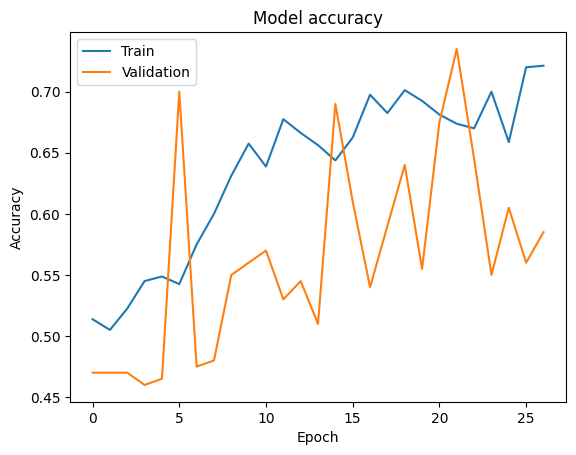

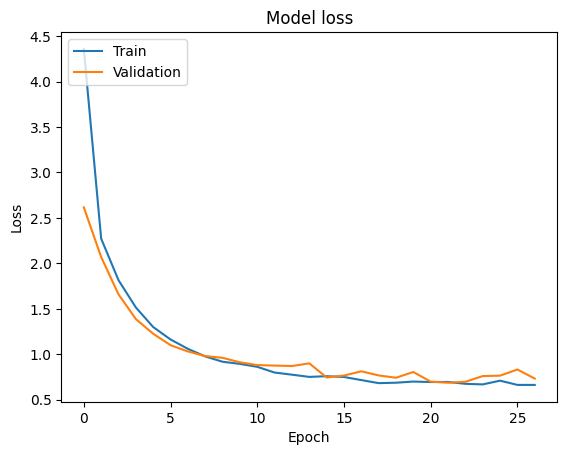

In [ ]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [ ]:
# history = model.fit(X_train_image,
#                     y_train,
#                     epochs=50,
#                     batch_size=32
#                     )

Epoch 1/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 37s 1s/step - accuracy: 0.4970 - loss: 3.2246
Epoch 2/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 35s 1s/step - accuracy: 0.5082 - loss: 2.4284
Epoch 3/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 37s 1s/step - accuracy: 0.4911 - loss: 1.9438
Epoch 4/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 35s 1s/step - accuracy: 0.5152 - loss: 1.6238
Epoch 5/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 36s 1s/step - accuracy: 0.5592 - loss: 1.4137
Epoch 6/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 35s 1s/step - accuracy: 0.5583 - loss: 1.2694
Epoch 7/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 35s 1s/step - accuracy: 0.5778 - loss: 1.1584
Epoch 8/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 36s 1s/step - accuracy: 0.6538 - loss: 1.0672
Epoch 9/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 35s 1s/step - accuracy: 0.5888 - loss: 1.0096
Epoch 10/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 35s 1s/step - accuracy: 0.6483 - loss: 0.9359
Epoch 11/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 35s 1s/step - accuracy: 0.6791 - loss: 0.8860
Epoch 12/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 35s 1s/step - accuracy: 0.6933 - lo

Results below:

In [ ]:
import matplotlib.pyplot as plt

   plt.plot(history.history['loss'], label='Training Loss')
   plt.plot(history.history['val_loss'], label='Validation Loss')
   plt.legend()
   plt.show()

Results below: Increased dropout rate to 0.3 Added dropout after dense layer. Created an optimizer with a lower learning rate.

In [ ]:
# Evaluate the model
model.evaluate(X_test_image, y_test)

7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 349ms/step - accuracy: 0.4691 - loss: 1.1413


[1.1482737064361572, 0.5]

Results below: Adjusted batch size from 64 to 32. Replaced activation function from ReLU to LeakyReLU

In [ ]:
# Evaluate the model
model.evaluate(X_test_image, y_test)

7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 350ms/step - accuracy: 0.7135 - loss: 0.6542


[0.6540418267250061, 0.7350000143051147]

Results below: Added a 3rd layer

In [ ]:
# Evaluate the model
model.evaluate(X_test_image, y_test)

7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 328ms/step - accuracy: 0.5121 - loss: 0.9615


[0.9434931874275208, 0.5400000214576721]

Results below: adjusted optimizer from rmsprop to adam. Adjusted outer layer activation to sigmoid. Added (Dropout(0.25)) to both convolutional layers.

In [ ]:
# Evaluate the model
model.evaluate(X_test_image, y_test)

7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 302ms/step - accuracy: 0.5684 - loss: 0.8126


[0.8134730458259583, 0.6000000238418579]

Results below: adjusted L2 regulization from 0.003 to 0.001. Adjusted optimizer from adam to rmsprop

In [ ]:
# Evaluate the model
model.evaluate(X_test_image, y_test)

7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 299ms/step - accuracy: 0.5609 - loss: 0.7086


[0.7094149589538574, 0.5600000023841858]

Results below is with implemeting early stopping. Batch size 64, epochs 30. L2 regularization 0.003

In [ ]:
# Evaluate the model
model.evaluate(X_test_image, y_test)

7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 274ms/step - accuracy: 0.6029 - loss: 0.8023


[0.8055529594421387, 0.5799999833106995]

Results below: Adjusted the L2 regularization strength from 0.001 to 0.005

In [ ]:
# Evaluate the model
model.evaluate(X_test_image, y_test)

7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 314ms/step - accuracy: 0.6634 - loss: 0.6786


[0.6886732578277588, 0.6399999856948853]

Results below: Increased batch size from 32 to 64. Epochs 30

In [ ]:
# Evaluate the model
model.evaluate(X_test_image, y_test)

7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 241ms/step - accuracy: 0.6004 - loss: 0.7135


[0.7167328596115112, 0.5899999737739563]

Results below: Increased number of epochs from 15 to 30.

In [ ]:
# Evaluate the model
model.evaluate(X_test_image, y_test)

7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 246ms/step - accuracy: 0.4312 - loss: 0.7881


[0.7872982621192932, 0.4699999988079071]

# Creating Web Application

In [ ]:
from flask import Flask, request, jsonify
import tensorflow as tf
from transformers import GPT2Tokenizer, TFGPT2LMHeadModel
from PIL import Image
import numpy as np

# Load the saved LSTM or GPT model
lstm_model = tf.keras.models.load_model('disaster_report_model.h5')

# If using GPT-2
gpt2_model = TFGPT2LMHeadModel.from_pretrained('disaster_gpt2_model')
tokenizer = GPT2Tokenizer.from_pretrained('disaster_gpt2_model_tokenizer')

app = Flask(__name__)

# Image preprocessing function
def preprocess_image(image, target_size=(224, 224)):
    image = Image.open(image)
    image = image.resize(target_size)
    image = np.array(image) / 255.0
    image = np.expand_dims(image, axis=0)  # Add batch dimension
    return image

# Report generation endpoint
@app.route('/generate_report', methods=['POST'])
def generate_report():
    file = request.files['image']

    # Preprocess the input image
    image = preprocess_image(file)

    # Extract features from the image using CNN
    image_features = lstm_model.predict(image)  # You may want to extract features only

    # Use the LSTM or GPT model to generate a report
    # If LSTM:
    # generated_report = lstm_model.predict(image_features)

    # If GPT-2:
    input_text = tokenizer.decode(image_features[0])  # Convert image features to text for GPT-2
    input_ids = tokenizer.encode(input_text, return_tensors="tf")
    generated_report = gpt2_model.generate(input_ids, max_length=100, num_return_sequences=1)

    report = tokenizer.decode(generated_report[0], skip_special_tokens=True)

    return jsonify({"report": report})

if __name__ == '__main__':
    app.run(debug=True)


In [ ]:
python app.py


In [ ]:
curl -X POST -F "image=@/path/to/disaster_image.jpg" http://127.0.0.1:5000/generate_report


In [ ]:
pip freeze > requirements.txt


In [ ]:
web: python app.py


In [ ]:
git init
heroku create
git add .
git commit -m "First commit"
git push heroku master
